# Allison's Notebook

Data Source: [Speed Bumps](https://data.wprdc.org/dataset/city-of-pittsburgh-speed-humps)

My data set contained information on all of the recorded speed bumps in Pittsburgh. The data collected included the street, neighborhood and longitude/latidude of each speed bump. It also included the material each bump was made up, the nearest fire station and the nearest police station. To help decide which neighborhood in Pittsburgh is the safest to drive in I used the amount of speed bumps per neighbor hood. We decided that for a neighborhood to be safe to drive in, it would have a higher amount of speed bumps. Speed bumps are used in vital in areas that can get high pedestrian traffic. When strategically placed, they can hinder speeding vehicles before crossings, entrances and exits, sharp turns, etc. Overall they help prevent prevent accidents by a large amount. Using this metric I was able to come to the personal conclusion of the safest neighborhood to drive in.

First, I imported pandas, matplot, and geopandas. I then read in my Speed Bumps data file that is stored in this folder as a csv. After that, I created a dataframe that has the number of speedbumps containtained in each neighborhod. 

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import geopandas
%matplotlib inline

data = pd.read_csv("SpeedBumps.csv")
data_neighborhood = data.groupby("neighborhood")['id'].count()

data_neighborhood

neighborhood
Bloomfield              3
Brookline               4
Carrick                 9
Central Oakland         1
Garfield                3
Highland Park           2
Homewood South          4
Mount Washington        3
North Oakland           6
Overbrook               1
Perry North             4
Polish Hill             6
South Side Flats        3
South Side Slopes       4
Squirrel Hill North     3
Squirrel Hill South    18
Stanton Heights         1
Upper Hill              4
Name: id, dtype: int64

I was interested to see the different specific streets and how much speed bumps they contain individually. I created another data frame that shows the streetname as well as the amount of speed bumps in it. Then I sorted them from least to greatest to signify which streets have the most and the least. Under the list I added a barchart to help display the data and compare streets. 

In [4]:
# find out how many different types of courts there are
different_streets = data.groupby("locator_street")['id'].count()
different_streets = different_streets.sort_values()
different_streets

locator_street
Summerset Dr      1
Black St          2
Darlington Rd     2
Heberton St       2
Mossfield St      2
Edmond St         3
Spokane St        3
Parkfield St      3
Grandview Ave     3
Muriel St         3
Beechwood Blvd    4
Mission St        4
Maytide St        4
Venture St        4
Jacob St          4
Finance St        4
Webster Ave       4
Gold Way          5
Parkview Blvd     5
Boundary St       5
Saline St         6
Melwood Ave       6
Name: id, dtype: int64

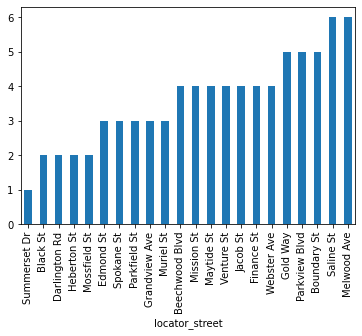

In [6]:
different_streets.plot.bar()

To represent which neighborhoods have the most speedbumps, I decided to make a map displaying the data. To create the map I read in the neighborhoods shapefile that was given to us in the previous lab. I then merged the shape file and the data_neighborhood data frame. The dark blue regions signify neighborhoods with the most speed bumps and as it gets lighter there are less speedbumps. The grey areas either have no speed bumps or none that were recorded. 

In [8]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") 

In [9]:
speedbumps_map = neighborhoods.merge(data_neighborhood, how='left', left_on='hood', right_index=True)

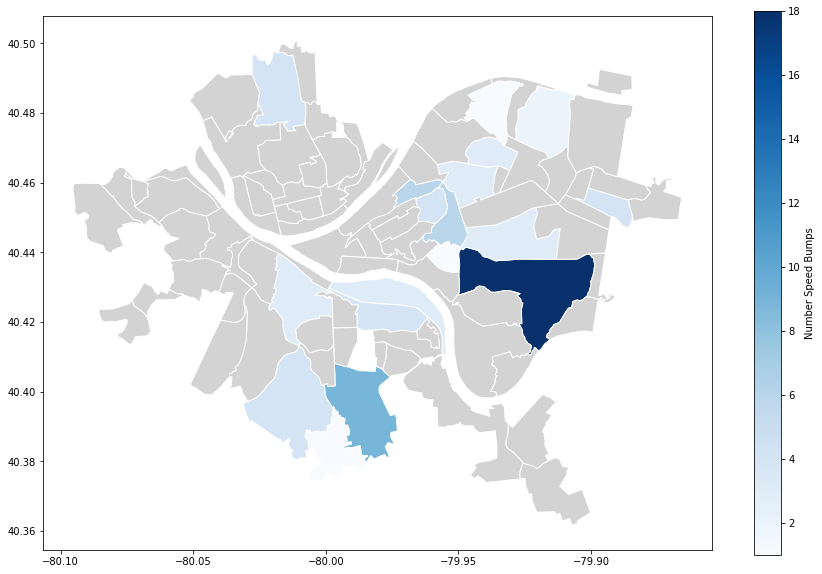

In [26]:
speedbumps_map.plot(column='id', 
               cmap='Blues',              
               edgecolor="white",        
               legend=True,              
               legend_kwds={'label': "Number Speed Bumps"}, 
               figsize=(15, 10),         
               missing_kwds={"color": "lightgrey"} 
               )

Below I created another list of the neighborhoods, this time in descending order so it is easier to identify which nieghborhoods have the most and the least speed bumps. 

In [27]:
sort_neighboorhoods = data_neighborhood.sort_values(ascending= False)
sort_neighboorhoods

neighborhood
Squirrel Hill South    18
Carrick                 9
North Oakland           6
Polish Hill             6
Perry North             4
Brookline               4
Homewood South          4
Upper Hill              4
South Side Slopes       4
Mount Washington        3
South Side Flats        3
Garfield                3
Squirrel Hill North     3
Bloomfield              3
Highland Park           2
Overbrook               1
Stanton Heights         1
Central Oakland         1
Name: id, dtype: int64

### Conclusion 

Strictly looking at the data on speed bumps, it can be infered that the nieghborhoods with the most amount of speed bumps are: 

* Squirrel Hill South 
* Carrick
* North Oakland

Squrrel Hill South has the highest amount of speed bumps, being the only nieghborhood with over 10 speed bumps. Therefore using the data collected I concluded that Squirrel Hill South is the safest nieghborhood to drive in. 